In [9]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert string representation of list to actual list

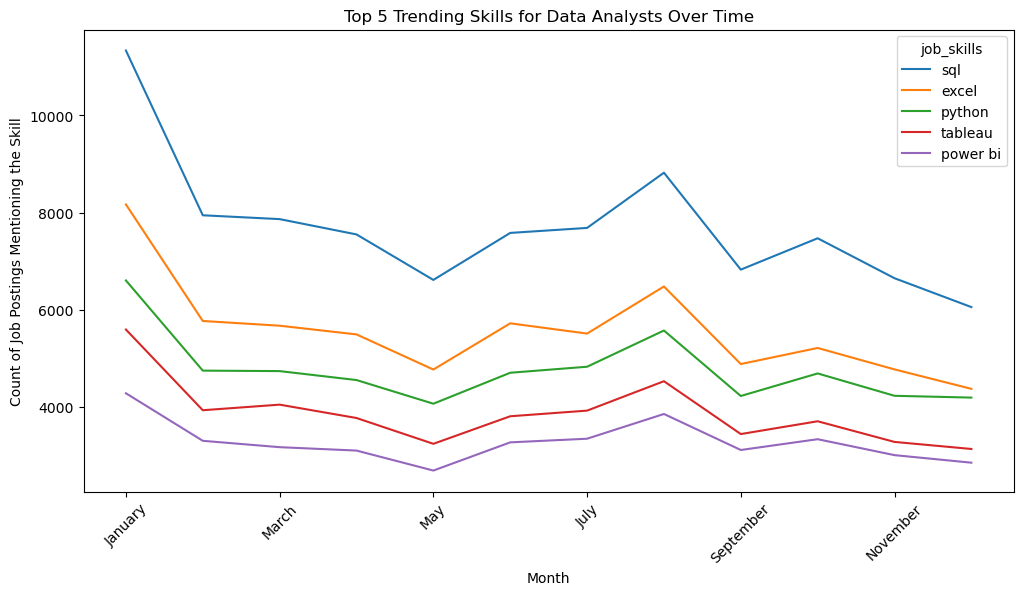

In [5]:
df_da = df[df.job_title_short == 'Data Analyst'].copy() #filtering data analyst jobs

df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month

df_da_explode = df_da.explode('job_skills')

df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0) #fill_value=0 to replace NaN with 0 for months where a skill was not mentioned

df_da_pivot.loc['total'] = df_da_pivot.sum() # Add a total row to sum up the counts for each skill across all months
df_da_pivot = df_da_pivot[df_da_pivot.loc['total'].sort_values(ascending=False).head(10).index]

df_da_pivot = df_da_pivot.drop('total') # Remove the total row for the line plot

df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(f'2024-{x}-01').strftime('%B')) # Convert month number to month name
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot = df_da_pivot.drop(columns=['job_posted_month_no']) # Drop the month number column as it's no longer needed. notice that everytime i am saving it again with df_da_pivot = ...

df_da_pivot.iloc[:, :5].plot(kind='line', figsize=(12, 6)) # Plot only the top 5 skills for better visibility
plt.title('Top 5 Trending Skills for Data Analysts Over Time') 
plt.xlabel('Month')
plt.ylabel('Count of Job Postings Mentioning the Skill')
plt.xticks(rotation=45)
plt.show()


In [6]:
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap
job_posted_month,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947
May,6617,4773,4070,3245,2695,2093,1940,979,957,851
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117
September,6829,4886,4229,3446,3118,2146,1880,944,945,852


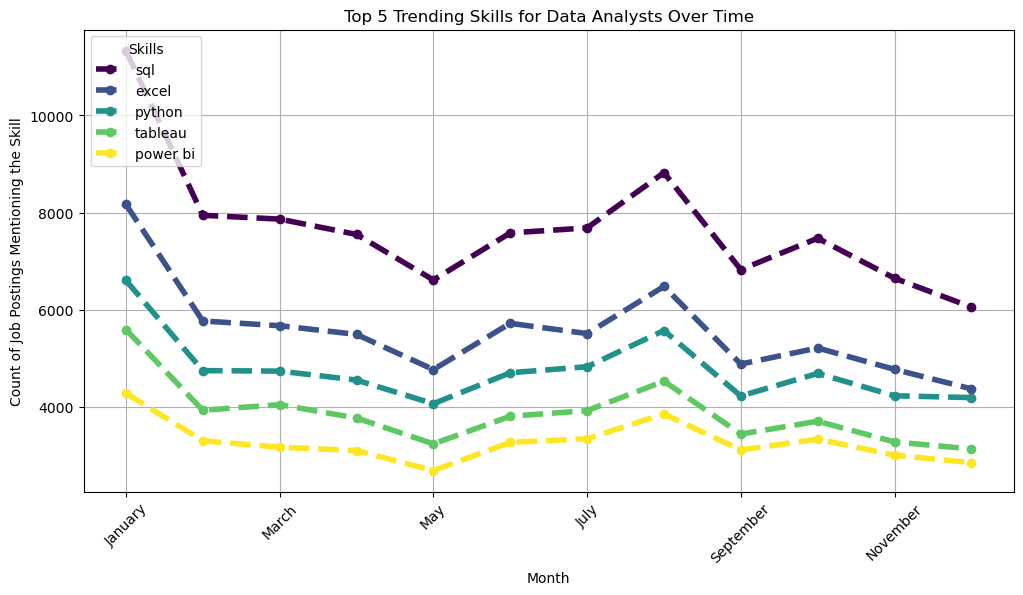

In [8]:
df_da_pivot.iloc[:, :5].plot(
    kind='line', 
    figsize=(12, 6), # Set the figure size to 12 inches wide and 6 inches tall
    marker='o', #options: 'o' for circles, 's' for squares, '^' for triangles, etc.
    linestyle='--', #options: '--' for dashed lines, '-' for solid lines, ':' for dotted lines
    linewidth=4, 
    colormap='viridis'
) # Plot only the top 5 skills for better visibility
plt.title('Top 5 Trending Skills for Data Analysts Over Time')
plt.xlabel('Month')
plt.ylabel('Count of Job Postings Mentioning the Skill')
plt.xticks(rotation=45)
plt.grid(True) # Add gridlines to the plot for better readability
plt.legend(title='Skills', loc='upper left') # Add a legend with the title 'Skills' and position it in the upper left corner
plt.show()